Desafio 36: Vendas de Produtos Online

📂 Dataset: Registros de vendas de uma loja online com informações de produto, valor, canal e data.
Colunas: ID_Venda, Data, Produto, Valor_Venda, Canal_Venda, Quantidade

🎯 Tarefas:

Identifique e corrija valores ausentes e categorias inconsistentes (ex: Instagram).

Qual foi o total de vendas (R$) por canal de venda?

Qual produto gerou a maior receita total no período?

Calcule o ticket médio de vendas (Valor total / número de vendas).

Crie um gráfico de barras mostrando a receita total por produto.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("dia_36_vendas_online.csv")
df.head()

,ID_Venda,Data,Produto,Valor_Venda,Canal_Venda,Quantidade
0,VND0001,2024-02-25,Notebook,1701.66,Site,1
1,VND0002,2024-03-06,Mouse,5537.92,Site,2
2,VND0003,2024-03-10,Webcam,3881.36,Redes Sociais,2
3,VND0004,2024-01-04,Smartphone,4937.95,Site,2
4,VND0005,2024-03-10,Fone de Ouvido,3674.54,App,2


In [39]:
#Identifique e corrija valores ausentes e categorias inconsistentes (ex: Instagram).
#Valor_Venda
df["Valor_Venda"] = pd.to_numeric(df["Valor_Venda"], errors="coerce")
df["Valor_Venda"] = df["Valor_Venda"].fillna(
    df.groupby("Produto")["Valor_Venda"].transform("mean").round(2)
)

#Canal_Venda
df["Canal_Venda"] = df["Canal_Venda"].replace({"Instagram": "Redes Sociais"})
df["Canal_Venda"].unique()

#Quantidade
df["Quantidade"] = pd.to_numeric(df["Quantidade"], errors="coerce")
df["Quantidade"] = df["Quantidade"].fillna(0)

In [44]:
#Qual foi o total de vendas (R$) por canal de venda?
totalVendasCanal = df.groupby("Canal_Venda")["Valor_Venda"].sum().reset_index(name="ValorTotal")
print(totalVendasCanal)

     Canal_Venda  ValorTotal
0            App   653798.96
1  Redes Sociais   755830.87
2           Site   717481.55


In [53]:
#Qual produto gerou a maior receita total no período?
df["Receita"] = df["Valor_Venda"] * df["Quantidade"]
receitaProduto = df.groupby("Produto")["Receita"].sum().sort_values(ascending=False)
print(receitaProduto.head(1).to_string())

Produto
Webcam    1134826.89


In [46]:
#Calcule o ticket médio de vendas (Valor total / número de vendas).
ticket_medio = (df["Valor_Venda"] * df["Quantidade"]).sum() / df["Quantidade"].sum()
print(f"Ticket médio de vendas: R$ {ticket_medio:.2f}")

Ticket médio de vendas: R$ 3479.52


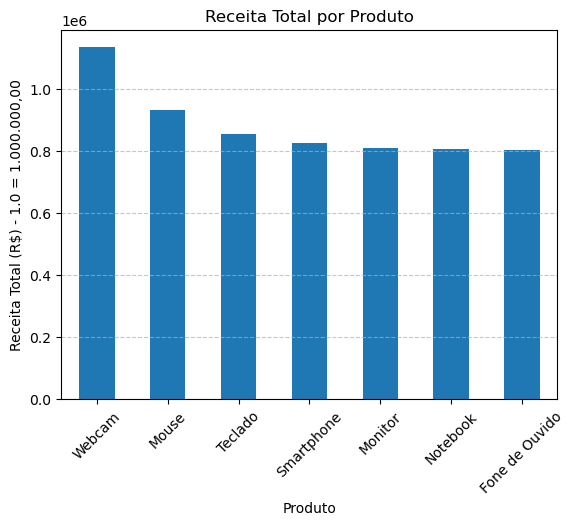

In [56]:
#Crie um gráfico de barras mostrando a receita total por produto.
receitaProduto.plot(kind="bar")
plt.title("Receita Total por Produto")
plt.xlabel("Produto")
plt.ylabel("Receita Total (R$) - 1.0 = 1.000.000,00")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()